# This is for homework 1

## Author: Wang Tianqi, Student ID: 1401213465

### Packages Importing

In [6]:
#for data processing and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [7]:
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#for machine learning
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Loading and Summarizing

In [11]:
#Load the data set from local
bank_df = pd.read_csv('./bank/bank.csv',sep=';')

In [12]:
#Check data frame's column
print(bank_df.columns.values)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [13]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [15]:
#Check the data type
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [24]:
#Summarize the numric data
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
#Summarize the ordinal data
bank_df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


### Data Processing

In [19]:
#Mapping categorical features
class_map={'no':0,'yes':1}
bank_df['default']=bank_df['default'].map(class_map)
bank_df['housing']=bank_df['housing'].map(class_map)
bank_df['loan']=bank_df['loan'].map(class_map)
bank_df['y']=bank_df['y'].map(class_map)

#Mapping ordinary features
job_map={'unknown':1,'student':2,'unemployed':3,'retired':4,'housemaid':5,'services':6,'blue-collar':7,'technician':8,'self-employed':9,'admin.':10,'management':11,'entrepreneur':12}
bank_df['job']=bank_df['job'].map(job_map)
education_map={'unknown':1,'primary':2,'secondary':3,'tertiary':4}
bank_df['education']=bank_df['education'].map(education_map)
month_map={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
bank_df['month']=bank_df['month'].map(month_map)

#Dummy nominal features
bank_df=pd.get_dummies(bank_df)
bank_df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,3,2,0,1787,0,0,19,10,79,...,0,1,0,1,0,0,0,0,0,1
1,33,6,3,0,4789,1,1,11,5,220,...,0,1,0,1,0,0,1,0,0,0
2,35,11,4,0,1350,1,0,16,4,185,...,0,0,1,1,0,0,1,0,0,0
3,30,11,4,0,1476,1,1,3,6,199,...,0,1,0,0,0,1,0,0,0,1
4,59,7,3,0,0,1,0,5,5,226,...,0,1,0,0,0,1,0,0,0,1


### Training and Testing Data Split

In [63]:
#Dataset split
X = bank_df.drop("y", axis=1)
Y = bank_df["y"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Data normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm= mms.fit_transform(X_train*1.0)
X_test_norm= mms.transform(X_test*1.0)

### Model Testing

In [50]:
# Choose job and education for model testing
X_train_try=X_train_norm[:,(1,2)]
X_test_try=X_test_norm[:,(1,2)]


# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_try, Y_train)
Y_pred = logreg.predict(X_test_try)
acc_log = round(logreg.score(X_train_try, Y_train) * 100, 2)


# Support Vector Machines

svc = SVC()
svc.fit(X_train_try, Y_train)
Y_pred = svc.predict(X_test_try)
acc_svc = round(svc.score(X_train_try, Y_train) * 100, 2)



# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_try, Y_train)
Y_pred = decision_tree.predict(X_test_try)
acc_decision_tree = round(decision_tree.score(X_train_try, Y_train) * 100, 2)



# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_try, Y_train)
Y_pred = random_forest.predict(X_test_try)
random_forest.score(X_train_try, Y_train)
acc_random_forest = round(random_forest.score(X_train_try, Y_train) * 100, 2)



In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
              'Decision Tree','Random Forest'],
    'Score': [acc_svc, acc_log, acc_decision_tree,acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,88.91
3,Random Forest,88.91
0,Support Vector Machines,88.81
1,Logistic Regression,88.81


In [65]:

##Try 10 times to randomly select 3 features and use different model to test, and rank
for test in range(10):
    aa=rnd.sample(range(16),3)
    if 15 in aa:
        aa.remove(15)
        aa.extend([19,20,21,22])
    elif 14 in aa:
        aa.remove(14)
        aa.extend([16,17,18])
    elif 13 in aa:
        aa.remove(13)
        aa.extend([13,14,15])
    X_train_try=X_train_norm[:,aa]
    X_test_try=X_test_norm[:,aa]
    
    # Logistic Regression

    logreg = LogisticRegression()
    logreg.fit(X_train_try, Y_train)
    Y_pred = logreg.predict(X_test_try)
    acc_log = round(logreg.score(X_train_try, Y_train) * 100, 2)


    # Support Vector Machines

    svc = SVC()
    svc.fit(X_train_try, Y_train)
    Y_pred = svc.predict(X_test_try)
    acc_svc = round(svc.score(X_train_try, Y_train) * 100, 2)



    # Decision Tree

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train_try, Y_train)
    Y_pred = decision_tree.predict(X_test_try)
    acc_decision_tree = round(decision_tree.score(X_train_try, Y_train) * 100, 2)



    # Random Forest

    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train_try, Y_train)
    Y_pred = random_forest.predict(X_test_try)
    random_forest.score(X_train_try, Y_train)
    acc_random_forest = round(random_forest.score(X_train_try, Y_train) * 100, 2)

    models = pd.DataFrame({
        'Model': ['Support Vector Machines',  'Logistic Regression', 
                  'Decision Tree','Random Forest'],
        'Score': [acc_svc, acc_log, acc_decision_tree,acc_random_forest]})
    print(list(X.columns[aa].values))
    print(models.sort_values(by='Score', ascending=False))

['loan', 'education', 'duration']
                     Model  Score
2            Decision Tree  95.73
3            Random Forest  95.73
1      Logistic Regression  89.10
0  Support Vector Machines  88.81
['balance', 'day', 'default']
                     Model  Score
2            Decision Tree  98.86
3            Random Forest  98.86
0  Support Vector Machines  88.81
1      Logistic Regression  88.81
['housing', 'loan', 'month']
                     Model  Score
2            Decision Tree  89.00
3            Random Forest  89.00
0  Support Vector Machines  88.81
1      Logistic Regression  88.81
['age', 'housing', 'duration']
                     Model  Score
2            Decision Tree  99.56
3            Random Forest  99.56
1      Logistic Regression  89.03
0  Support Vector Machines  88.81
['month', 'housing', 'pdays']
                     Model  Score
2            Decision Tree  92.35
3            Random Forest  92.35
0  Support Vector Machines  88.81
1      Logistic Regression  88

### Data Visualization

In [94]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, Y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'blue', 'lightgreen', 'red', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], 
                    y=X[Y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, Y_test = X[test_idx, :], Y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

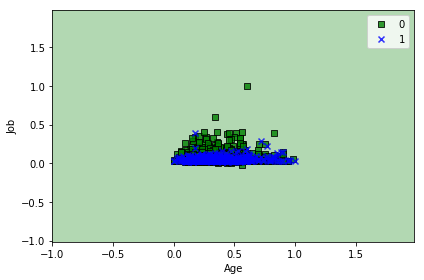

In [97]:
aa=[0,4]
Features=list(bank_df.columns[aa].values)
X_train_try=X_train_norm[:,aa]
X_test_try=X_test_norm[:,aa]
X_combined = np.vstack((X_train_try, X_test_try))
Y_combined = np.hstack((Y_train, Y_test))


#SVM Plotting
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_try, Y_train)

plot_decision_regions(X=X_combined, Y=Y_combined,
                      classifier=svm)
plt.xlabel('Age')
plt.ylabel('Job')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()